# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# About the data

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_df.shape, test_df.shape

((7613, 5), (3263, 4))

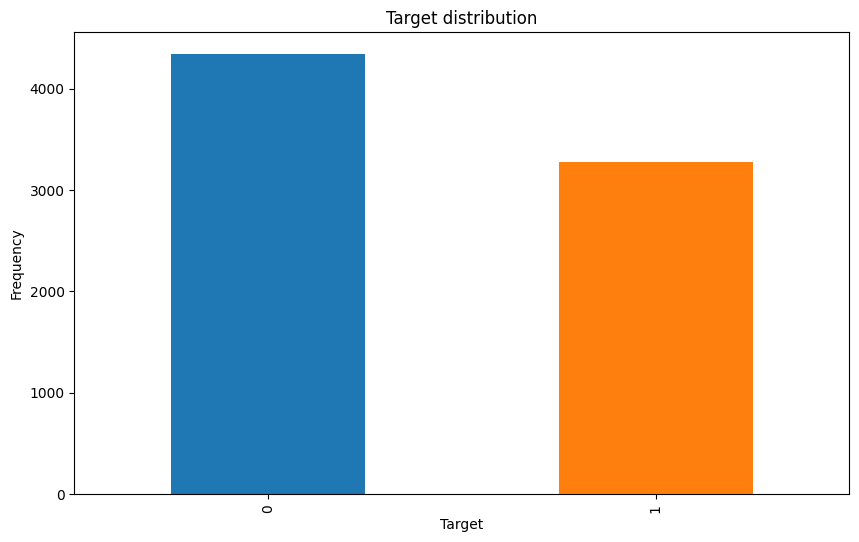

In [5]:
# Plotting the distribution of the target variable and color coding by the target variable

pd.value_counts(train_df['target']).plot.bar( figsize=(10,6), color=['#1f77b4', '#ff7f0e'])
# label the plot
plt.title('Target distribution');
plt.xlabel('Target');
plt.ylabel('Frequency');

- From above we can see that dataset is almost balanced.

In [6]:
# check the percentage of nan values in each column in train data

(train_df.isnull().sum()/len(train_df))*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [7]:
# check the percentage of nan values in each column in test data

(test_df.isnull().sum()/len(test_df))*100

id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
dtype: float64

- So only location and keyword are missing values and almost they are missing in same proportion in both train and test data.

- Let's see these missing values in detail


## Keyword

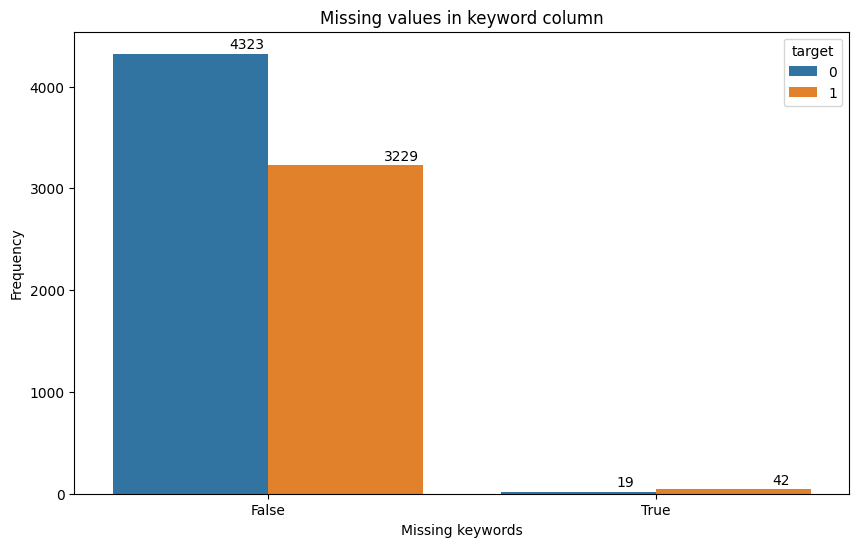

In [8]:
def plot_missing_keyword(df):
    '''
    Function to plot the missing keywords for the target variable
    '''

    fig, ax = plt.subplots(figsize=(10, 6))
    # df['keyword'].isnull().value_counts().plot.bar(color=['#1f77b4', '#ff7f0e'])
    sns.countplot(x=df['keyword'].isnull(), hue=df['target'], palette=['#1f77b4', '#ff7f0e'])
    # label the plot
    plt.title('Missing values in keyword column');
    plt.xlabel('Missing keywords');
    plt.ylabel('Frequency');
    plt.xticks(rotation=0);
    # add annotation
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
    plt.show()

    

plot_missing_keyword(train_df)

- Ratio of missing values in train data and test data is almost same.

In [9]:
# display the missing values in train data

train_df[train_df.isnull().any(axis=1)].iloc[:,3][11]

'Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding'

In [10]:
# display unique keywords in train data

train_keywords = train_df['keyword'].unique()

train_keywords, len(train_keywords)

(array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
        'ambulance', 'annihilated', 'annihilation', 'apocalypse',
        'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
        'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
        'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
        'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
        'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
        'buildings%20burning', 'buildings%20on%20fire', 'burned',
        'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
        'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
        'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
        'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
        'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
        'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       

In [11]:
# display unique keywords in test data

test_keywords = test_df['keyword'].unique()

test_keywords, len(test_keywords)

(array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
        'ambulance', 'annihilated', 'annihilation', 'apocalypse',
        'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
        'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
        'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
        'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
        'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
        'buildings%20burning', 'buildings%20on%20fire', 'burned',
        'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
        'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
        'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
        'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
        'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
        'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       

In [12]:
# display the nan values in keyword column in train data

train_df[train_df['keyword'].isnull()]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [13]:
# display the nan values in keyword column in test data

test_df[test_df['keyword'].isnull()]

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


- We can fill the keyword in the missing values by looking at the text column.


- Filling the keyword from the unique keywords which are present in the text column.

In [14]:
def fill_keyword_from_text(df):
    for i in range(len(df)):
        if pd.isnull(df.iloc[i,1]):
            text = df.iloc[i,3]
            splited_text = text.split()
            for j in range(len(splited_text)):
                if splited_text[j] in train_keywords:
                    df.iloc[i,1] = splited_text[j]
                    break
    return df

In [15]:
train_df = fill_keyword_from_text(train_df)

test_df = fill_keyword_from_text(test_df)

In [16]:
train_df[train_df['keyword'].isnull()].shape, test_df[test_df['keyword'].isnull()].shape

((39, 5), (18, 4))

- So few keywords are still missing

- Filling the rest of the missing values with neutral 

In [17]:

train_df['keyword'].fillna('neutral', inplace=True)

In [18]:
test_df['keyword'].fillna('neutral', inplace=True)

In [19]:
train_df['keyword'].isnull().sum(), test_df['keyword'].isnull().sum()

(0, 0)

- Now let's see the distribution of the keywords

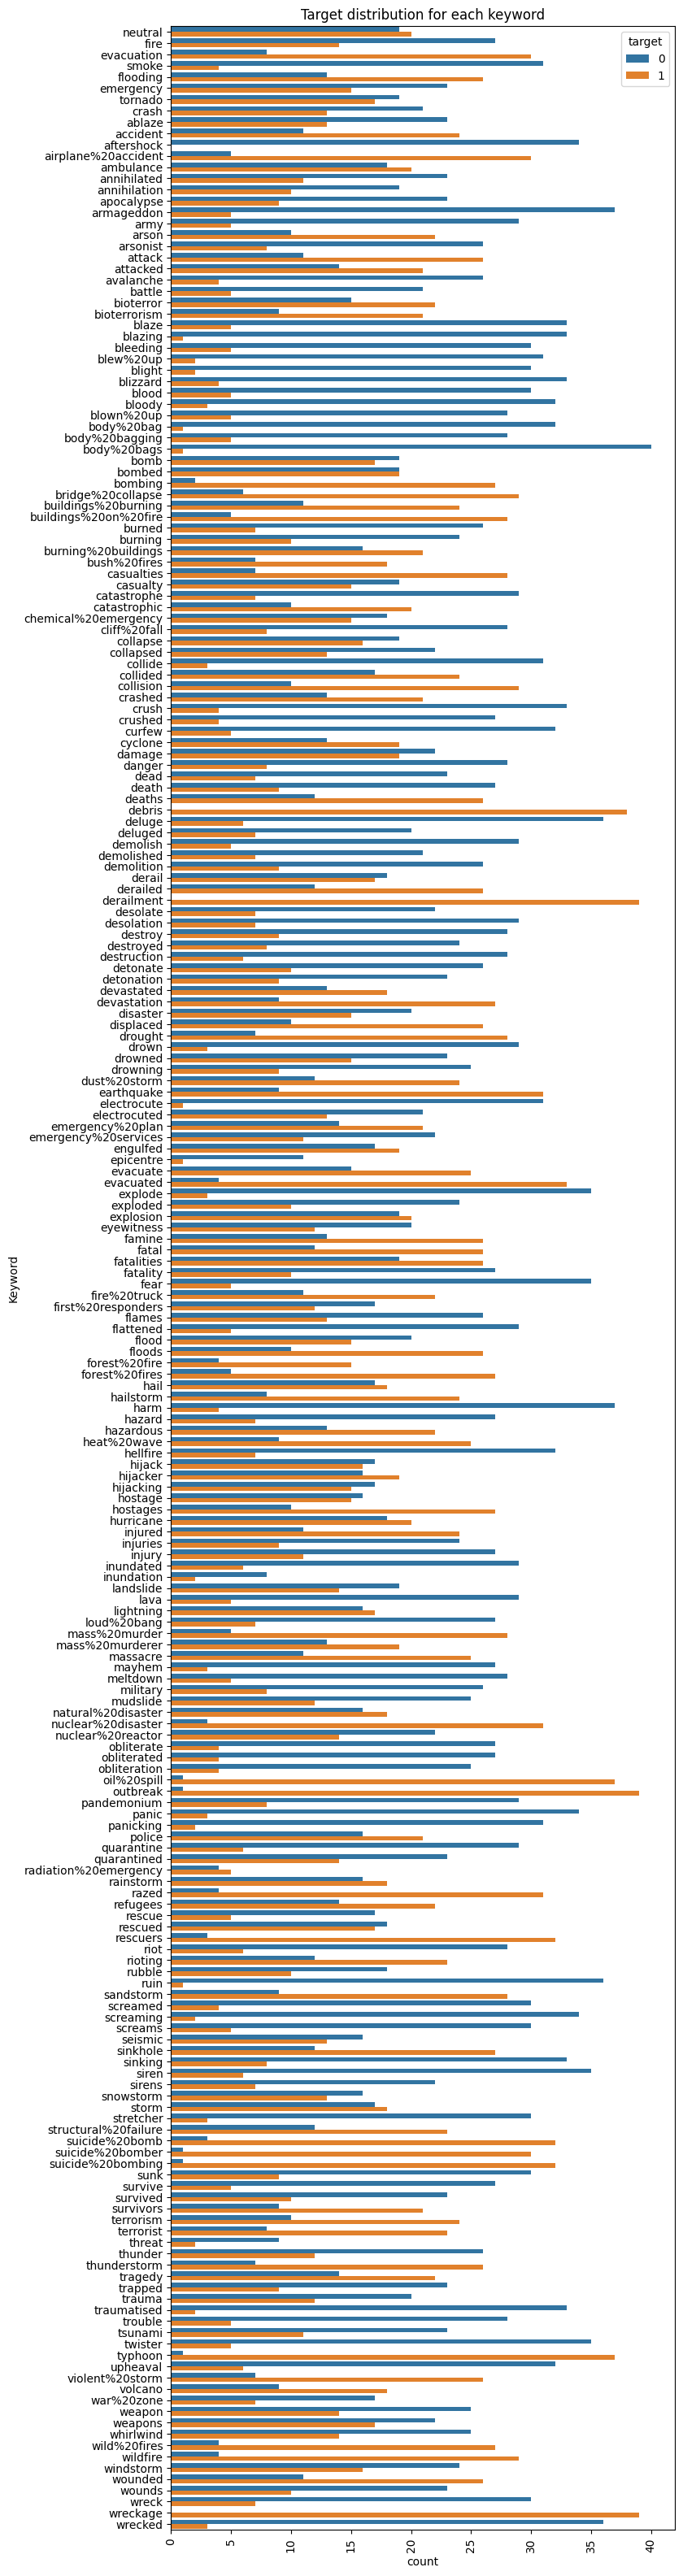

In [20]:
# Plot the target for each keyword row-wise

fig, ax = plt.subplots(figsize=(8, 40))
sns.countplot(y=train_df['keyword'], hue=train_df['target'], palette=['#1f77b4', '#ff7f0e'])
# label the plot
plt.title('Target distribution for each keyword');
plt.xlabel('count');
plt.ylabel('Keyword');
plt.xticks(rotation=90);
# add annotation
plt.show()


## Location

- Missing location values in train and test data are:

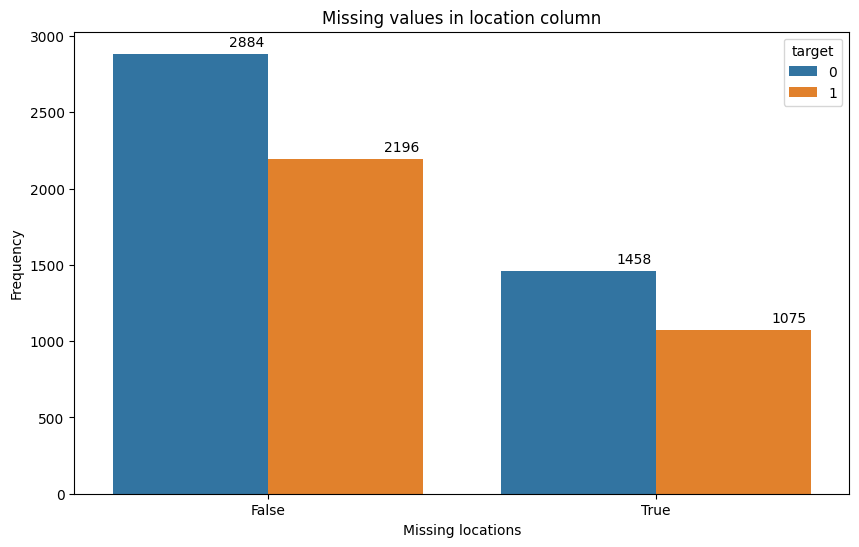

In [21]:
def plot_missing_location(df):
    '''
    Function to plot the missing keywords for the target variable
    '''

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x=df['location'].isnull(), hue=df['target'], palette=['#1f77b4', '#ff7f0e'])
    # label the plot
    plt.title('Missing values in location column');
    plt.xlabel('Missing locations');
    plt.ylabel('Frequency');
    plt.xticks(rotation=0);
    # add annotation
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
    plt.show()

    

plot_missing_location(train_df)

- Here also missing ratio is almost same in both train and test data.

In [22]:
train_df[train_df['location'].isnull()].shape[0], test_df[test_df['location'].isnull()].shape[0]

(2533, 1105)

- Unique locations in train dataset are:

In [23]:
train_location = train_df['location'].unique()

len(train_location)

3342

- Unique locations in test dataset are:

In [24]:
test_location = test_df['location'].unique()

len(test_location)

1603

- We can fill the location in the missing values by looking at the text column same as keyword.

In [25]:
test_df.iloc[0,0]

0

In [26]:
def fill_location_from_text(df):
    for i in range(len(df)):
        if pd.isnull(df.iloc[i,2]):
            text = df.iloc[i,3]
            splited_text = text.split()
            for j in range(len(splited_text)):
                if splited_text[j] in train_location:
                    df.iloc[i,2] = splited_text[j]
                    break
    return df

In [27]:
train_df = fill_location_from_text(train_df)

In [28]:
test_df = fill_location_from_text(test_df)

- Remaining missing values are filled with nowhere

In [29]:
train_df[train_df['location'].isnull()].shape[0], test_df[test_df['location'].isnull()].shape[0]

(2006, 886)

In [30]:
train_df['location'].fillna('nowhere', inplace=True)

test_df['location'].fillna('nowhere', inplace=True)

- So now all the missing values are filled

## Text

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shailja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

- We will clean the text column by removing the:


1. hyperlinks, twitter mark and hastags
2. Remove the stopwords and punctuations
<!-- 3. Stem the words -->


### Hyperlinks, twitter mark and hastags

- We will remove the hyperlinks, twitter mark and hastags from the text column

In [33]:
def remove_useless_words(tweet):
    '''
    Function to remove useless words from the tweets
    '''

    #Removing the @user
    tweet = re.sub(r'@[^\s]+', '', tweet)

    #Removing the links
    tweet = re.sub(r'http:\S+', '', tweet)
    tweet = re.sub(r'https:\S+', '', tweet)

    #Removing non ASCII characters
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)
    #Removing punctuation and special characters
    chars = ["!", "#", ",", ".", ":", ";", "?", "-", "~", ")", "(", "=", ">", "<", "/"]
    for char in chars:
        if char in tweet:
            tweet = tweet.replace(char, "")
            
    # remove old style retweet tweet "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)

    # remove URLs (by the Twitter URL) 
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove mentions
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)

    # remove punctuations like quote, exclamation sign, etc.
    tweet = re.sub(r'[' + string.punctuation + ']+', ' ', tweet)

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    # remove numbers
    tweet = re.sub(r'\d+', '', tweet)

    return tweet

### Removing stopwords and punctuations

<!-- - Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form.

- Example: words like 'running', 'runs', 'runned' will be reduced to 'run'

- We will use PorterStemmer from nltk library -->

In [37]:
def remove_stopwords(tweet):
    '''
    Function to remove stopwords
    '''


    # remove stopwords
    stopwords_english = stopwords.words('english')
    clean_tweet = ""


    if len(tweet.split()) > 3:
        tweet = [word for word in tweet.split() if word not in stopwords_english]
    return " ".join(tweet)

### Combining all the above steps in a function

In [38]:
def process_text(tweet):

    tweet = remove_useless_words(tweet)

    clean_tweet = remove_stopwords(tweet)

    return clean_tweet

In [39]:
# let's test the function with an example

tweet = train_df['text'][5]

print('Original tweet: ')
print(tweet)
print()
print('Processed tweet: ')
print(process_text(tweet))

Original tweet: 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires

Processed tweet: 
RockyFire Update California Hwy closed directions due Lake County fire CAfire wildfires


- Processing to all the text column

In [40]:
# apply the function to the train

train_df['text'] = train_df['text'].apply(lambda x: process_text(x))

In [41]:
# apply the function to the test

test_df['text'] = test_df['text'].apply(lambda x: process_text(x))

In [42]:
train_df.head()

,id,keyword,location,text,target
0,1,neutral,us,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,4,fire,Canada,Forest fire near La Ronge Sask Canada,1
2,5,evacuation,nowhere,All residents asked shelter place notified off...,1
3,6,evacuation,California,people receive wildfires evacuation orders Cal...,1
4,7,smoke,nowhere,Just got sent photo Ruby Alaska smoke wildfire...,1


- Now at last drop the ids column

In [43]:
train_df = train_df.drop(['id'], axis=1)

In [44]:
# Save the test id for submission

test_id = test_df['id']

test_df = test_df.drop(['id'], axis=1)

- There are locations and keywords which are captialised, hence we will convert them to lower case

In [45]:
def lower_case(text):
    '''
    Function to convert the text to lowercase
    '''
    return text.lower()

train_df['keyword'] = train_df['keyword'].apply(lambda x: lower_case(x))
train_df['location'] = train_df['location'].apply(lambda x: lower_case(x))

test_df['keyword'] = test_df['keyword'].apply(lambda x: lower_case(x))
test_df['location'] = test_df['location'].apply(lambda x: lower_case(x))

In [46]:
train_df.head()

,keyword,location,text,target
0,neutral,us,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,fire,canada,Forest fire near La Ronge Sask Canada,1
2,evacuation,nowhere,All residents asked shelter place notified off...,1
3,evacuation,california,people receive wildfires evacuation orders Cal...,1
4,smoke,nowhere,Just got sent photo Ruby Alaska smoke wildfire...,1


- Save the data

In [47]:
# save the preprocessed data

train_df.to_csv('data/train_preprocessed.csv', index=False)

test_df.to_csv('data/test_preprocessed.csv', index=False)

# save the test id

test_id.to_csv('data/test_id.csv', index=False)